### Key Features:
- Data Loading:
Uses Pandas to read two Excel files containing batch data and metabolite data.
df holds viable cell counts, while metabolite stores metabolite information.
- Model Fitting:
Defines a function fitted_vcd to model viable cell growth over time.
Uses curve_fit to estimate the model parameters for each batch, and visualizes the actual and predicted data.
- Growth Rate Calculation:
Calculates growth rates for each batch using a defined time interval (delta_time).
Updates the batch DataFrame with a new column 'Growth Rate'.
- Specific Rate Calculation:
Implements the calculate_specific_rate function to compute specific rates of metabolites uptake/secretion.
Loops through each batch and specified time intervals, calculating specific rates for different metabolites.
- Results Storage:
Stores calculated specific rates in a structured format using dictionaries (results and cumulative_results).
Supports further analysis and export.
### Requirements:
Data Files: Excel files with specific sheets and header structures, which must align with the code.
### Usage:
- Adjust File Paths:
Update file paths (file_path and file_path_meta) and file names to point to your actual data files.
- Check Data Structure:
Ensure data files contain the necessary columns and rows, and are grouped by the appropriate batch IDs.
- Run the Code:
Execute the script to load data, fit models, calculate growth rates, and compute specific rates.
- Review Results:
Check the visualizations, results lists, and cumulative results for analysis.
- Extend the Analysis:
Use the results for further analysis, data export, or integration with other tools.

In [1]:
import pickle
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
# Read the excel file (model)
#file_path = r"C:\Users\user\Documents\DC\Manual curation_iCHO\Whole-Cell-Network-Reconstruction-for-CHO-cells_origin\Whole-Cell-Network-Reconstruction-for-CHO-cells\Data\ZeLa Data"
file_name = "ELN_Excel data sheet_Bio141 to Bio148.xlsx"
sheet_name = "All data"


#full_path = f"{file_path}/{file_name}"

df_tmp = pd.read_excel(file_name, sheet_name=sheet_name, header = 17)

df = df_tmp[['Batch ID', 'Sample ID', 'Viable Cells', 'Age (h)','Total Volume','Base Volume','Eff Feed B Volume', 'Gluc Feed Volume']]

start_row = 1
end_row = 129


viable_cells = df.iloc[start_row:end_row]  

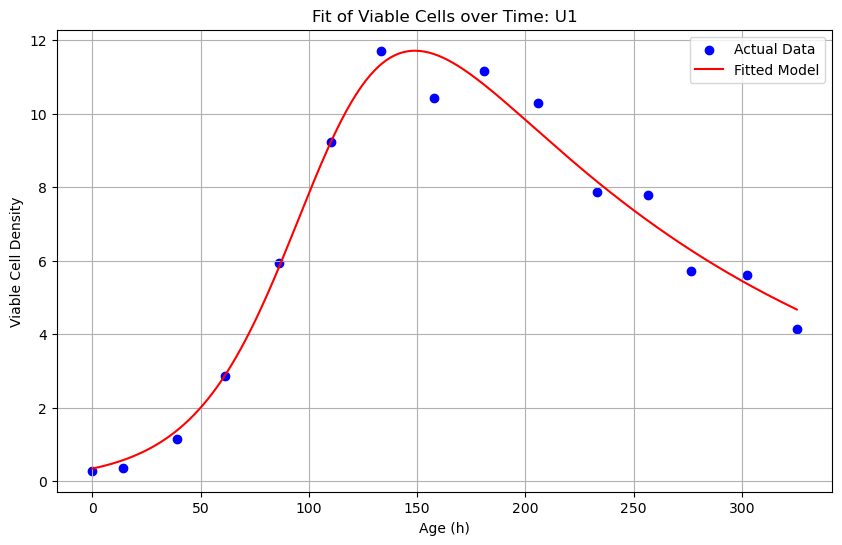

at 0==> initial_vcd:0.2761296557086965; final_vcd:0.4266654557342982; delta_time:12
0.03569930922364134 growth rate
0.03626080897059533 growth rate_log
at 14.033333333333337==> initial_vcd:0.4591764597659924; final_vcd:0.7064915869134281; delta_time:12
0.035361000050850626 growth rate
0.035906392818203355 growth rate_log
at 39.25==> initial_vcd:1.1272976679564337; final_vcd:1.7043927201343614; delta_time:12
0.03396646367160579 growth rate
0.03444879558729832 growth rate_log
at 61.13333333333334==> initial_vcd:2.3669245724366315; final_vcd:3.4500266012059124; delta_time:12
0.03103292419108297 growth rate
0.03139920648309292 growth rate_log
at 86.16666666666667==> initial_vcd:4.994004517770152; final_vcd:6.679539592277007; delta_time:12
0.02406488635923561 growth rate
0.024234247113719853 growth rate_log
at 110.25000000000003==> initial_vcd:8.432283085862547; final_vcd:9.957332935180046; delta_time:12
0.013821657537351859 growth rate
0.013853474509027741 growth rate_log
at 133.1666666666

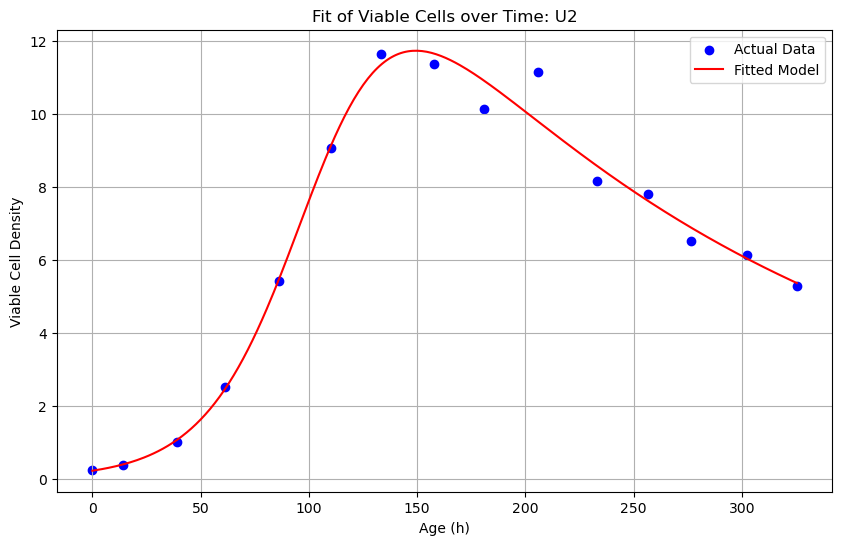

at 0==> initial_vcd:0.1719514318215657; final_vcd:0.28109984497425367; delta_time:12
0.04015307565353832 growth rate
0.04095815521727723 growth rate_log
at 14.033333333333331==> initial_vcd:0.3054300690290446; final_vcd:0.49732894022175494; delta_time:12
0.03984152756956829 growth rate
0.04062756774408468 growth rate_log
at 39.25==> initial_vcd:0.8447576110151748; final_vcd:1.351385743239643; delta_time:12
0.03844831981201081 growth rate
0.03915300717513089 growth rate_log
at 61.133333333333326==> initial_vcd:1.9642203326377712; final_vcd:3.0180441340511757; delta_time:12
0.0352525044404739 growth rate
0.035792799545563296 growth rate_log
at 86.14999999999999==> initial_vcd:4.594711467557774; final_vcd:6.3804057441570725; delta_time:12
0.027117315198135157 growth rate
0.027360477538182753 growth rate_log
at 110.25==> initial_vcd:8.268479638139148; final_vcd:9.900452476986802; delta_time:12
0.014970361021649408 growth rate
0.015010817443280441 growth rate_log
at 133.15==> initial_vcd:10

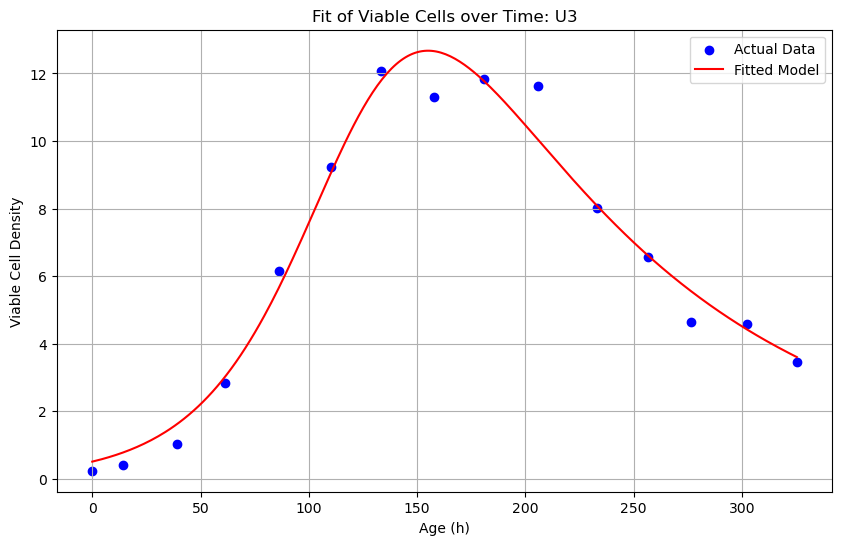

at 0==> initial_vcd:0.4280433948068763; final_vcd:0.612618048136064; delta_time:12
0.029560470823764336 growth rate
0.029876422943445252 growth rate_log
at 14.033333333333337==> initial_vcd:0.6508640100062221; final_vcd:0.9290273514947144; delta_time:12
0.029344142290078114 growth rate
0.02965312115501729 growth rate_log
at 39.25==> initial_vcd:1.3687396989213172; final_vcd:1.9335799314834903; delta_time:12
0.028507246207667133 growth rate
0.028790231905463242 growth rate_log
at 61.116666666666674==> initial_vcd:2.551154659588518; final_vcd:3.5298135904610835; delta_time:12
0.02682300171699857 growth rate
0.027058249829199087 growth rate_log
at 86.13333333333334==> initial_vcd:4.908411817431166; final_vcd:6.457452218384088; delta_time:12
0.02271480631347372 growth rate
0.02285703465427223 growth rate_log
at 110.25==> initial_vcd:8.193074785368632; final_vcd:9.889030350668168; delta_time:12
0.015631988574158283 growth rate
0.015678069861688848 growth rate_log
at 133.13333333333333==> in

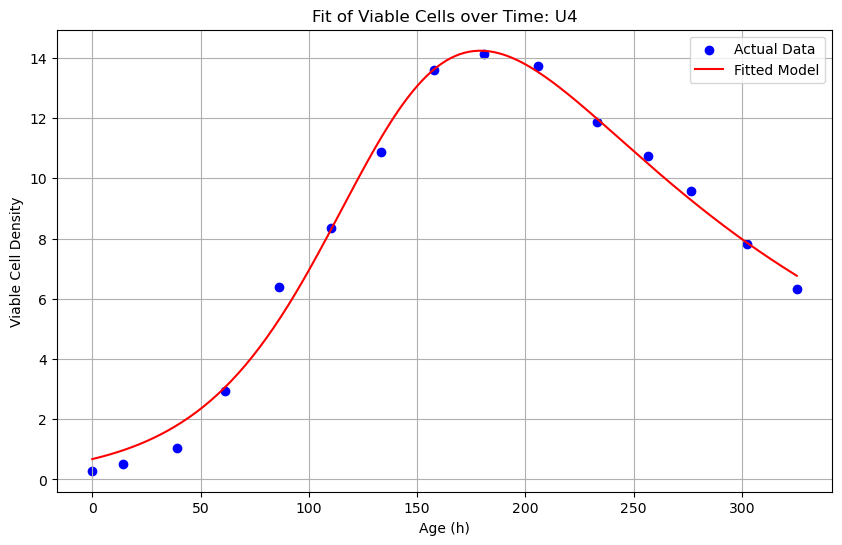

at 0==> initial_vcd:0.5788266774569529; final_vcd:0.785392563998272; delta_time:12
0.02523615465221134 growth rate
0.025431715803210478 growth rate_log
at 14.016666666666666==> initial_vcd:0.8265718562196913; final_vcd:1.1187104380946788; delta_time:12
0.02502966473716471 growth rate
0.025220421042514415 growth rate_log
at 39.25==> initial_vcd:1.555974824832948; final_vcd:2.0879999397897895; delta_time:12
0.02433355284280819 growth rate
0.02450869958100375 growth rate_log
at 61.1==> initial_vcd:2.6446030527399773; final_vcd:3.4967394626761603; delta_time:12
0.0231256821505811 growth rate
0.02327583106175656 growth rate_log
at 86.11666666666667==> initial_vcd:4.6653214309873405; final_vcd:5.975051775710139; delta_time:12
0.020515106617663904 growth rate
0.020619669047367246 growth rate_log
at 110.25==> initial_vcd:7.4953728761462965; final_vcd:9.112416119212213; delta_time:12
0.01622775959238004 growth rate
0.016279334330370987 growth rate_log
at 133.11666666666667==> initial_vcd:10.565

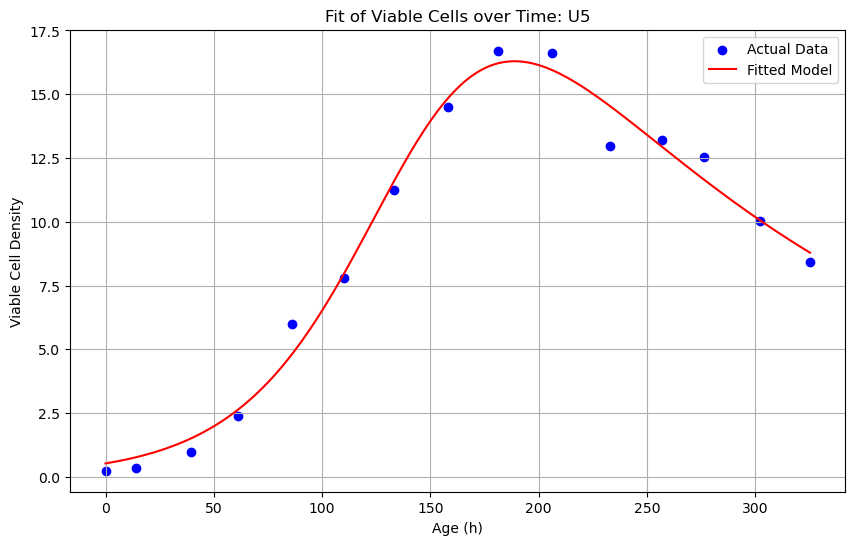

at 0==> initial_vcd:0.4481239596541764; final_vcd:0.6190631766002154; delta_time:12
0.026696226484700797 growth rate
0.026928120003094438 growth rate_log
at 14.000000000000004==> initial_vcd:0.6532236104986654; final_vcd:0.9005875129054012; delta_time:12
0.026533029946052323 growth rate
0.026760653010599045 growth rate_log
at 39.25==> initial_vcd:1.2799098515466147; final_vcd:1.752404269529867; delta_time:12
0.025969957768068958 growth rate
0.026183255531044936 growth rate_log
at 61.1==> initial_vcd:2.258447865701949; final_vcd:3.0542111111064614; delta_time:12
0.024964374364396854 growth rate
0.025153628187894312 growth rate_log
at 86.1==> initial_vcd:4.182796948998255; final_vcd:5.502022553527926; delta_time:12
0.022702636226821525 growth rate
0.02284463435990926 growth rate_log
at 110.25==> initial_vcd:7.1091328482156255; final_vcd:8.912844485548325; delta_time:12
0.01876289049470862 growth rate
0.018842763570626236 growth rate_log
at 133.1==> initial_vcd:10.63352338387626; final_vc

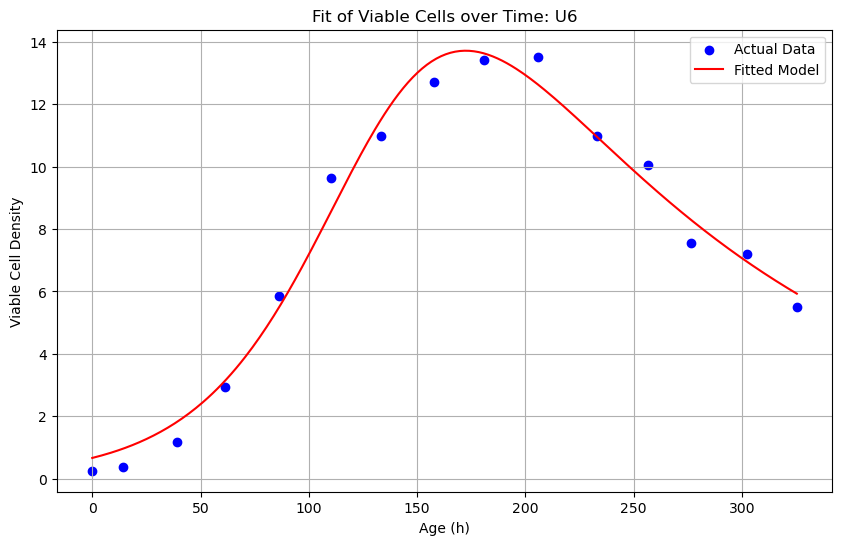

at 0==> initial_vcd:0.5650606419383252; final_vcd:0.774096452492686; delta_time:12
0.026015843775119497 growth rate
0.026230285433190198 growth rate_log
at 13.98333333333333==> initial_vcd:0.8152754373880955; final_vcd:1.1138303374502556; delta_time:12
0.025793894072257174 growth rate
0.026002841036980116 growth rate_log
at 39.25==> initial_vcd:1.5660741487968082; final_vcd:2.119472600988318; delta_time:12
0.025025615363752734 growth rate
0.025216278250045132 growth rate_log
at 61.1==> initial_vcd:2.7015560156576037; final_vcd:3.5956675303421957; delta_time:12
0.023664172740925922 growth rate
0.02382514565139481 growth rate_log
at 86.1==> initial_vcd:4.820030313875575; final_vcd:6.185903060906854; delta_time:12
0.02068388478165276 growth rate
0.020791065515703904 growth rate_log
at 110.25==> initial_vcd:7.752230289740424; final_vcd:9.376218538841545; delta_time:12
0.015802056035095623 growth rate
0.015849663300040968 growth rate_log
at 133.08333333333334==> initial_vcd:10.7805153649742

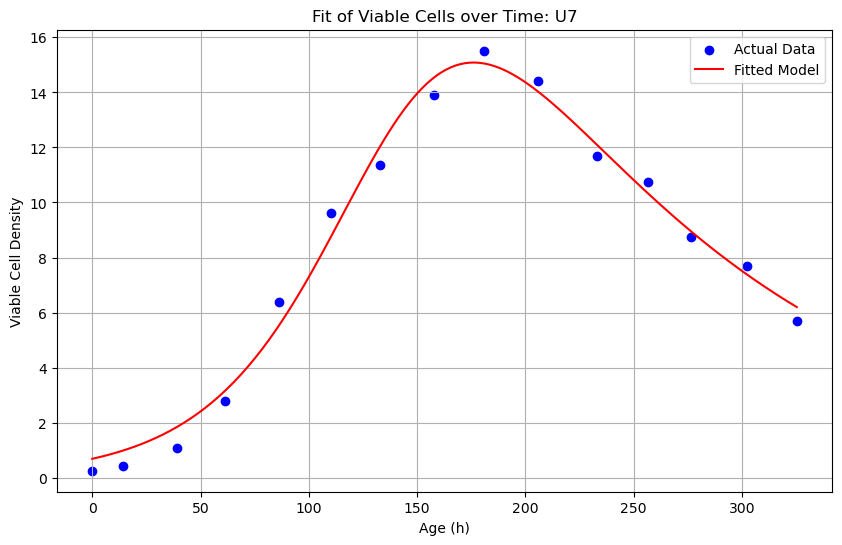

at 0==> initial_vcd:0.5891081985189818; final_vcd:0.8005526347359175; delta_time:12
0.025359237683160087 growth rate
0.025557701428735823 growth rate_log
at 13.966666666666665==> initial_vcd:0.8416914130878893; final_vcd:1.1413216232017973; delta_time:12
0.025183076176723027 growth rate
0.02537739451650196 growth rate_log
at 39.25==> initial_vcd:1.5934982286051602; final_vcd:2.1445412913926805; delta_time:12
0.02456916519294578 growth rate
0.024749494675613142 growth rate_log
at 61.08333333333333==> initial_vcd:2.722933115967739; final_vcd:3.615501716748366; delta_time:12
0.023469742513656414 growth rate
0.02362674855829583 growth rate_log
at 86.08333333333333==> initial_vcd:4.848597131468786; final_vcd:6.246339585175349; delta_time:12
0.02099670160968909 growth rate
0.021108851161849313 growth rate_log
at 110.25==> initial_vcd:7.890656198078024; final_vcd:9.651580541730718; delta_time:12
0.01673032891767838 growth rate
0.016786865743621832 growth rate_log
at 133.06666666666666==> init

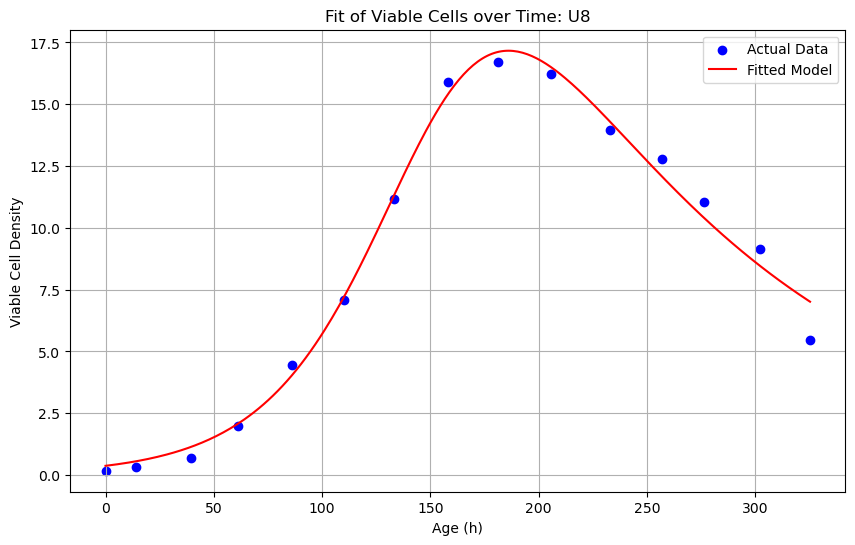

at 0==> initial_vcd:0.3128291003398707; final_vcd:0.4404555277145398; delta_time:12
0.02823776091654837 growth rate
0.028512703792350897 growth rate_log
at 13.950000000000001==> initial_vcd:0.46560379815905917; final_vcd:0.6548488505782071; delta_time:12
0.028150089256698218 growth rate
0.028422449382283586 growth rate_log
at 39.25==> initial_vcd:0.9539879862846596; final_vcd:1.3362422711878206; delta_time:12
0.027817747702875113 growth rate
0.028080466665818645 growth rate_log
at 61.08333333333334==> initial_vcd:1.7564690500765596; final_vcd:2.4403419316031263; delta_time:12
0.027158433888329055 growth rate
0.02740271608711643 growth rate_log
at 86.08333333333334==> initial_vcd:3.453433103917131; final_vcd:4.699368888120499; delta_time:12
0.025470502563008427 growth rate
0.025671615144573685 growth rate_log
at 110.25==> initial_vcd:6.308561574705118; final_vcd:8.229747713348532; delta_time:12
0.02202441036503561 growth rate
0.02215397239777339 growth rate_log
at 133.05==> initial_vcd:

In [2]:
# Define function: fitted_vcd model
def fitted_vcd(time_value, A, B, C, D):
    return A / (np.exp(B * time_value) + C * np.exp(-D * time_value))

# Dictionary of DataFrames grouped by Batch ID
batch_dfs = {batch_id: df_group for batch_id, df_group in df.groupby('Batch ID')}

# For each Batch ID, remove the first row, fit the model, and calculate the growth rate
for batch_id in ['U1', 'U2', 'U3', 'U4', 'U5', 'U6', 'U7', 'U8']:
    if batch_id in batch_dfs:  # Check if the Batch ID exists
        # Identify the index of the first row
        first_row_index = batch_dfs[batch_id].index[0]
        # Remove the first row
        batch_dfs[batch_id] = batch_dfs[batch_id].drop(first_row_index)
        
        # Extract valid data (excluding NaN)
        time_values = batch_dfs[batch_id]['Age (h)'].dropna().values  # Array of time values
        viable_cells = (batch_dfs[batch_id]['Viable Cells'])*(batch_dfs[batch_id]['Total Volume']-batch_dfs[batch_id]['Base Volume']-batch_dfs[batch_id]['Eff Feed B Volume']- batch_dfs[batch_id]['Gluc Feed Volume'])/batch_dfs[batch_id]['Total Volume']  # Array of cell counts
        viable_cells = viable_cells.dropna().values
        # Fit model parameters using curve_fit
        params, _ = curve_fit(fitted_vcd, time_values, viable_cells, p0=[100, 0.01, 100, 0.05])

        # Set range of time values for predictions
        time_values_fit = np.linspace(min(time_values), max(time_values), 300)

        # Calculate predictions based on the fitted model
        fitted_values = fitted_vcd(time_values_fit, *params)

        # Plot actual data and fitted model
        plt.figure(figsize=(10, 6))
        plt.scatter(time_values, viable_cells, color='blue', label='Actual Data')  # Actual data
        plt.plot(time_values_fit, fitted_values, color='red', label='Fitted Model')  # Fitted model
        plt.xlabel('Age (h)')
        plt.ylabel('Viable Cell Density')
        plt.title(f'Fit of Viable Cells over Time: {batch_id}')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Calculate growth rate using delta_time
        delta_time = 12 # 0.5 for instant time point
        growth_rates = []
        growth_rates_log = []
        fitted_vcd_value = []
###--------------------------fixed part-----------------------------
        for time in time_values:
            vcd_fit = fitted_vcd(time, *params)
            final_vcd = fitted_vcd(time + delta_time/2, *params)
            fitted_vcd_value.append(vcd_fit)
            initial_vcd = fitted_vcd(time - delta_time/2, *params)
            growth_rate = (final_vcd - initial_vcd) / ((final_vcd + initial_vcd) / 2 * delta_time)
            growth_rates.append(growth_rate)
            if initial_vcd > 0:  # Ensure no division by zero
                growth_rate_log = (np.log(final_vcd) - np.log(initial_vcd)) / delta_time
                growth_rates_log.append(growth_rate_log)
            else:
                growth_rates_log.append(np.nan)  # Handle case where initialvcd is zero or negative

            print(f"at {time}==> initial_vcd:{initial_vcd}; final_vcd:{final_vcd}; delta_time:{delta_time}\n{growth_rate} growth rate")
            print(f"{growth_rate_log} growth rate_log")
###-------------------------------------------------------------------
        # Add results to DataFrame
        batch_dfs[batch_id]['Growth Rate'] = growth_rates
        # Add results to DataFrame
        batch_dfs[batch_id]['Growth Rate_R'] = growth_rate_log
        batch_dfs[batch_id]['fitted_VCD'] = fitted_vcd_value
        print(batch_dfs[batch_id]['fitted_VCD'])

In [3]:
#file_path_meta = r"C:\Users\user\Documents\DC\Manual curation_iCHO\Whole-Cell-Network-Reconstruction-for-CHO-cells_origin\Whole-Cell-Network-Reconstruction-for-CHO-cells\Data\ZeLa Data"
file_name_meta = "processing_ELN_Excel data sheet_Bio141 to Bio148.xlsx"
sheet_name_meta = "Amount of uptake and secretion"
sheet_name_gr = "Growth_Rate"

#full_path_meta = f"{file_path_meta}/{file_name_meta}"

df_meta = pd.read_excel(file_name_meta, sheet_name=sheet_name_meta, header = 2)
df_gr = pd.read_excel(file_name_meta, sheet_name=sheet_name_gr, header = 0)
df_meta.columns = df_meta.columns.str.strip() # Remove trailing blank spaces from the column names

start_row = 0
end_row = 129


metabolite = df_meta.iloc[start_row:end_row]  
batch_dfs_meta = {batch_id: df_group for batch_id, df_group in metabolite.groupby('Batch ID')}
batch_dfs_raw = {batch_id: df_group for batch_id, df_group in df_gr.groupby('Batch_ID')}

In [4]:
def calculate_specific_rate(delta_met, growth_rate, initial_time, current_time, VC_t=None, VC_i=None, IVCD=None):
    try:
        time_interval = current_time - initial_time
        if (VC_t is not None and VC_i is not None) and IVCD is None:
            cell_delta = VC_t - VC_i
        elif (VC_t is None and VC_i is None) and IVCD is not None:
            cell_delta = IVCD
        

        # Zero division handling for `cell_delta`
        if cell_delta == 0:
            return 0

        # Zero division handling for other parameters
        if time_interval == 0 or growth_rate == 0:
            return float('nan')

        SR = delta_met/ cell_delta * growth_rate/(200/1000)
        return SR
    except Exception as e:
        print(f"Error calculating specific rate: {e}")
        return float('nan')

In [5]:
intervals = [("P0", "P2"), ("P2", "P4"), ("P4", "P6"), ("P6", "P8"), ("P8", "P12"), ("P12", "P14")]
preprocessing = 'raw' # 'smoothened'

# Ensure results structures are initialized
results = []
results_for_check = []
cumulative_results = {}

# Loop through each Batch ID to calculate specific rates
for batch_id in ['U1', 'U2', 'U3', 'U4', 'U5', 'U6', 'U7', 'U8']:
    if batch_id in batch_dfs_meta:
        # Drop the first row
        first_row_index = batch_dfs_meta[batch_id].index[0]
        batch_dfs_meta[batch_id] = batch_dfs_meta[batch_id].drop(first_row_index)

        # Get the list of metabolites
        met_list = batch_dfs_meta[batch_id].columns[2:].tolist()

        # Calculate the specific rates for each interval
        for start, end in intervals:
            end_row = batch_dfs_meta[batch_id][batch_dfs_meta[batch_id]['Sample ID'] == end]
            start_row = batch_dfs_meta[batch_id][batch_dfs_meta[batch_id]['Sample ID'] == start]

            # Proceed only if both rows exist
            if not end_row.empty and not start_row.empty:
                try:
                    if preprocessing == 'smoothened':
                        # Extract necessary values
                        growth_rate = batch_dfs[batch_id][batch_dfs[batch_id]['Sample ID'] == end]['Growth Rate'].values[0]
                        VC_t = batch_dfs[batch_id][batch_dfs[batch_id]['Sample ID'] == end]['fitted_VCD'].values[0]
                        VC_i = batch_dfs[batch_id][batch_dfs[batch_id]['Sample ID'] == start]['fitted_VCD'].values[0]
                        IVCD = None
    #                     VC_t = batch_dfs[batch_id][batch_dfs[batch_id]['Sample ID'] == end]['Viable Cells'].values[0]
    #                     VC_i = batch_dfs[batch_id][batch_dfs[batch_id]['Sample ID'] == start]['Viable Cells'].values[0]
     
                        current_time = batch_dfs[batch_id][batch_dfs[batch_id]['Sample ID'] == end]['Age (h)'].values[0]
                        initial_time = batch_dfs[batch_id][batch_dfs[batch_id]['Sample ID'] == start]['Age (h)'].values[0]

                    elif preprocessing == 'raw':
                        # Extract necessary values
                        growth_rate = batch_dfs_raw[batch_id][batch_dfs_raw[batch_id]['Sample ID'] == end]['Growth Rate'].values[0]
                        IVCD = batch_dfs_raw[batch_id][batch_dfs_raw[batch_id]['Sample ID'] == end]['VCD'].values[0]
                        VC_t = None
                        VC_i = None
     
                        current_time = batch_dfs_raw[batch_id][batch_dfs_raw[batch_id]['Sample ID'] == end]['Age (h)'].values[0]
                        initial_time = batch_dfs_raw[batch_id][batch_dfs_raw[batch_id]['Sample ID'] == start]['Age (h)'].values[0]
                    
                    # Initialize cumulative results structure if missing
                    if batch_id not in cumulative_results:
                        cumulative_results[batch_id] = {}
                    if (start, end) not in cumulative_results[batch_id]:
                        cumulative_results[batch_id][(start, end)] = {}

                    # Save the growth rate in the cumulative results
                    cumulative_results[batch_id][(start, end)]['SGR'] = growth_rate
                    # Loop through each metabolite to calculate specific rates
                    results.append({
                        'Batch ID': batch_id,
                        'Interval': f"{start} to {end}",
                        'metabolite': 'SGR',
                        'Specific Rate': growth_rate
                    })
                    for met_name in met_list:
                        delta_met = end_row[met_name].values[0]

                        # Calculate specific rate
                        specific_rate = calculate_specific_rate(delta_met, growth_rate, initial_time, current_time, VC_t=VC_t, VC_i=VC_i, IVCD=IVCD)
                        # Save the results
                        results.append({
                            'Batch ID': batch_id,
                            'Interval': f"{start} to {end}",
                            'metabolite': met_name,
                            'Specific Rate': specific_rate
                        })
                        results_for_check.append({
                            'check': f"{delta_met}/{growth_rate}/{VC_t}/{VC_i}/{IVCD}/{initial_time}/{current_time}"
                        })

                        # Initialize cumulative results structure if missing
                        if batch_id not in cumulative_results:
                            cumulative_results[batch_id] = {}
                        if (start, end) not in cumulative_results[batch_id]:
                            cumulative_results[batch_id][(start, end)] = {}

                        # Store cumulative results
                        cumulative_results[batch_id][(start, end)][met_name] = specific_rate


                except Exception as e:
                    print(f"Error processing interval {start}-{end} for batch {batch_id}: {e}")

In [6]:
# Convert the example results to a Pandas DataFrame
results_df = pd.DataFrame(results)

# Create a pivot table: Use Batch ID and Interval as indices and metabolites as columns
pivot_df = results_df.pivot_table(index=['Batch ID', 'Interval'], columns='metabolite', values='Specific Rate')

# Export to an Excel file
pivot_df.to_excel('specific_rates_R.xlsx', sheet_name='Specific Rates')


In [7]:

# Assuming pivot_df is indexed by ('Batch ID', 'Interval') and the columns are various metabolites including 'SGR'
group1_batches = ['U1', 'U2', 'U3']
group2_batches = ['U4', 'U5', 'U6', 'U7', 'U8']

# Create masks for the groups
mask_group1 = pivot_df.index.get_level_values('Batch ID').isin(group1_batches)
mask_group2 = pivot_df.index.get_level_values('Batch ID').isin(group2_batches)

# Filter data for each group
data_group1 = pivot_df[mask_group1]
data_group2 = pivot_df[mask_group2]

# Calculate means for each group by Interval
# Here, we use groupby on the 'Interval' level of the index, then calculate mean
group1_averages = data_group1.groupby(level='Interval').mean()
group2_averages = data_group2.groupby(level='Interval').mean()


In [8]:
# Use ExcelWriter to add these DataFrames to an existing Excel file as new sheets
with pd.ExcelWriter('specific_rates_R.xlsx', mode='a', engine='openpyxl', if_sheet_exists='replace') as writer:
    group1_averages.to_excel(writer, sheet_name='Avg_U1_U3')
    group2_averages.to_excel(writer, sheet_name='Avg_U4_U8')

In [9]:
# Create a mapping dict to incorporate all the uptake and secretion values to reactions in our reconstruction

mapping_dict = {
    "3-hydroxybutyric acid": "EX_bhb_e",
    "NH4": "EX_nh4_e",
    "acetic acid": "EX_ac_e",
    "alanine": "EX_ala_L_e",
    "arginine": "EX_arg_L_e",
    "asparagine": "EX_asn_L_e",
    "aspartic acid": "EX_asp_L_e",
    "butyric & 2-hydroxy- butyric acids": "EX_2hb_e",
    "citric acid": "EX_cit_e",
    "cystine": "EX_cys_L_e",
    "ethanol": "EX_etoh_e",
    "formic acid": "EX_for_e",
    "fumaric acid": "EX_fum_e",
    "glucose": "EX_glc_e",
    "glutamic acid": "EX_glu_L_e",
    "glutamine": "EX_gln_L_e",
    "glycine": "EX_gly_e",
    "histidine": "EX_his_L_e",
    "hydroxyproline": "EX_4hpro_e",
    "isoleucine": "EX_ile_L_e",
    "isovaleric acid": None,
    "lactic acid": "EX_lac_L_e",
    "leucine": "EX_leu_L_e",
    "lysine": "EX_lys_L_e",
    "malic acid": "EX_mal_L_e",
    "methionine": "EX_met_L_e",
    "phenylalanine": "EX_phe_L_e",
    "proline": "EX_pro_L_e",
    "pyroglutamic acid": "EX_5oxpro_e",
    "pyruvic acid": "EX_pyr_e",
    "serine": "EX_ser_L_e",
    "threonine": "EX_thr_L_e",
    "tryptophan": "EX_trp_L_e",
    "tyrosine": "EX_tyr_L_e",
    "valine": "EX_val_L_e",
    "SGR": "exp_growth_rate"
}

In [10]:
# Create a new dictionary with the name of the reactions as keys, times as subkeys and uptake and secretion rates as values, save as python dict

########################
## ------- WT -------##
#######################

# Raw Results
uptake_secretion_raw_wt_dict = {}
for original_col, new_col in mapping_dict.items():
    if new_col is not None and original_col in data_group1.columns:
        uptake_secretion_raw_wt_dict[new_col] = data_group1[original_col].to_dict()
# Save the dictionary to a file
with open('../Uptake_Secretion_Rates/uptake_secretion_raw_wt_dict.pkl', 'wb') as file:
    pickle.dump(uptake_secretion_raw_wt_dict, file)

# Mean
uptake_secretion_mean_wt_dict = {}
for original_col, new_col in mapping_dict.items():
    if new_col is not None and original_col in group1_averages.columns:
        uptake_secretion_mean_wt_dict[new_col] = group1_averages[original_col].to_dict()
# Save the dictionary to a file
with open('../Uptake_Secretion_Rates/uptake_secretion_mean_wt_dict.pkl', 'wb') as file:
    pickle.dump(uptake_secretion_mean_wt_dict, file)


##########################
## ------- ZeLa -------##
#########################

# Raw Results
uptake_secretion_raw_zela_dict = {}
for original_col, new_col in mapping_dict.items():
    if new_col is not None and original_col in data_group2.columns:
        uptake_secretion_raw_zela_dict[new_col] = data_group2[original_col].to_dict()
# Save the dictionary to a file
with open('../Uptake_Secretion_Rates/uptake_secretion_raw_zela_dict.pkl', 'wb') as file:
    pickle.dump(uptake_secretion_raw_zela_dict, file)

uptake_secretion_mean_zela_dict = {}
for original_col, new_col in mapping_dict.items():
    if new_col is not None and original_col in group2_averages.columns:
        uptake_secretion_mean_zela_dict[new_col] = group2_averages[original_col].to_dict()
with open('../Uptake_Secretion_Rates/uptake_secretion_mean_zela_dict.pkl', 'wb') as file:
    pickle.dump(uptake_secretion_mean_zela_dict, file)

In [11]:
# Save as CSV file witht the addition of the SK_23camp_l constraint set equally for all the conditions

########################
## ------- WT -------##
#######################

data_group1.drop(columns=['isovaleric acid'], inplace=True)
data_group1.rename(columns=mapping_dict, inplace=True)
data_group1['SK_23camp_l'] = -0.014
data_group1.to_csv('../Uptake_Secretion_Rates/uptake_secretion_rates_wt.csv')


##########################
## ------- ZeLa -------##
#########################

data_group2.drop(columns=['isovaleric acid'], inplace=True)
data_group2.rename(columns=mapping_dict, inplace=True)
data_group2['SK_23camp_l'] = -0.014
data_group2.to_csv('../Uptake_Secretion_Rates/uptake_secretion_rates_zela.csv')

/var/folders/_x/tfg8s2ks4n1ftkkwzp5sqjpc0000gn/T/ipykernel_11612/859848168.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_group1.drop(columns=['isovaleric acid'], inplace=True)
/var/folders/_x/tfg8s2ks4n1ftkkwzp5sqjpc0000gn/T/ipykernel_11612/859848168.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_group1.rename(columns=mapping_dict, inplace=True)
/var/folders/_x/tfg8s2ks4n1ftkkwzp5sqjpc0000gn/T/ipykernel_11612/859848168.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

### Generate Uptake and Secretion Rate Intervals
Here we calculate the mean and the std for each utake and secretion rate. We then generate intervals going from mean-std to mean+std for each metabolite. We then save the results in the 'specific_rates_R.xlsx' in new sheets called 'Int_U1_U3' and 'Int_U4_U8'

In [ ]:
# Assuming pivot_df is indexed by ('Batch ID', 'Interval') and the columns are various metabolites including 'SGR'
group1_batches = ['U1', 'U2', 'U3']
group2_batches = ['U4', 'U5', 'U6', 'U7', 'U8']

# Create masks for the groups
mask_group1 = pivot_df.index.get_level_values('Batch ID').isin(group1_batches)
mask_group2 = pivot_df.index.get_level_values('Batch ID').isin(group2_batches)

# Filter data for each group
data_group1 = pivot_df[mask_group1]
data_group2 = pivot_df[mask_group2]

# Calculate means and standard deviations for each group by Interval
group1_stats = data_group1.groupby(level='Interval').agg(['mean', 'std'])
group2_stats = data_group2.groupby(level='Interval').agg(['mean', 'std'])


def create_interval_df(group_stats):
    mean_df = group_stats.xs('mean', axis=1, level=1)
    std_df = group_stats.xs('std', axis=1, level=1)
    lower_bound_df = mean_df - (std_df)
    upper_bound_df = mean_df + (std_df)
    
    interval_df = mean_df.copy()  # Create a DataFrame to hold the intervals with the same index
    for col in mean_df.columns:
        interval_df[f'{col}'] = list(zip(lower_bound_df[col], upper_bound_df[col]))
    return interval_df

# Create intervals DataFrame for each group
group1_intervals_df = create_interval_df(group1_stats)
group2_intervals_df = create_interval_df(group2_stats)

In [ ]:
# Use ExcelWriter to add these DataFrames to an existing Excel file as new sheets
with pd.ExcelWriter('specific_rates_R.xlsx', mode='a', engine='openpyxl', if_sheet_exists='replace') as writer:
    group1_intervals_df.to_excel(writer, sheet_name='Int_U1_U3')
    group2_intervals_df.to_excel(writer, sheet_name='Int_U4_U8')

In [ ]:
# Create a new dictionary with the name of the reactions as keys, times as subkeys and uptake and secretion rates as values

# WT
uptake_secretion_intrvl_wt_dict = {}
for original_col, new_col in mapping_dict.items():
    if new_col is not None and original_col in group1_intervals_df.columns:
        uptake_secretion_intrvl_wt_dict[new_col] = group1_intervals_df[original_col].to_dict()
# Save the dictionary to a file
with open('../Uptake_Secretion_Rates/uptake_secretion_intrvl_wt_dict.pkl', 'wb') as file:
    pickle.dump(uptake_secretion_intrvl_wt_dict, file)

# ZeLa
uptake_secretion_intrvl_zela_dict = {}
for original_col, new_col in mapping_dict.items():
    if new_col is not None and original_col in group2_intervals_df.columns:
        uptake_secretion_intrvl_zela_dict[new_col] = group2_intervals_df[original_col].to_dict()
with open('../Uptake_Secretion_Rates/uptake_secretion_intrvl_zela_dict.pkl', 'wb') as file:
    pickle.dump(uptake_secretion_intrvl_zela_dict, file)